In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 


In [2]:
purchase_behaviour= pd.read_csv(r"C:\Users\swastik\Desktop\Ignosis dataset\purchase_behaviour.csv")
transaction_data=pd.read_csv(r"C:\Users\swastik\Desktop\Ignosis dataset\transaction_data.csv")

In [3]:
purchase_behaviour.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [4]:
purchase_behaviour.shape

(72637, 3)

In [5]:
transaction_data.shape

(264836, 8)

In [6]:
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [7]:
purchase_behaviour.dtypes

LYLTY_CARD_NBR       int64
LIFESTAGE           object
PREMIUM_CUSTOMER    object
dtype: object

In [8]:
transaction_data.dtypes

DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object

In [9]:
# converting the DATE column into readable date format 
transaction_data['DATE'] = pd.to_datetime(transaction_data['DATE'], origin='1899-12-30', unit='D')

In [10]:
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


the date has been converted to the required time format 

In [11]:
# merging both the dataframes for better comparison and merging on basis of LYLTY_CARD_NBR
merged_df = transaction_data.merge(purchase_behaviour, on="LYLTY_CARD_NBR", how="left")


In [12]:
merged_df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,YOUNG SINGLES/COUPLES,Premium
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,YOUNG SINGLES/COUPLES,Premium
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,YOUNG SINGLES/COUPLES,Premium
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,YOUNG SINGLES/COUPLES,Premium


In [14]:
# looking for missing values 
merged_df.isnull().sum()


DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

There are no missing values

In [16]:
# looking for duplicates and removing the duplicate values
merged_df.duplicated().sum()
merged_df = merged_df.drop_duplicates()



In [18]:
# checking for any inconsistent and or unexpected values 

#checking for unique values 
print(merged_df['LIFESTAGE'].unique())
print(merged_df['PREMIUM_CUSTOMER'].unique())
print(merged_df['PROD_NAME'].unique()[:10])  # Check first 10 unique product names

['YOUNG SINGLES/COUPLES' 'MIDAGE SINGLES/COUPLES' 'NEW FAMILIES'
 'OLDER FAMILIES' 'OLDER SINGLES/COUPLES' 'RETIREES' 'YOUNG FAMILIES']
['Premium' 'Budget' 'Mainstream']
['Natural Chip        Compny SeaSalt175g' 'CCs Nacho Cheese    175g'
 'Smiths Crinkle Cut  Chips Chicken 170g'
 'Smiths Chip Thinly  S/Cream&Onion 175g'
 'Kettle Tortilla ChpsHny&Jlpno Chili 150g'
 'Old El Paso Salsa   Dip Tomato Mild 300g'
 'Smiths Crinkle Chips Salt & Vinegar 330g'
 'Grain Waves         Sweet Chilli 210g'
 'Doritos Corn Chip Mexican Jalapeno 150g'
 'Grain Waves Sour    Cream&Chives 210G']


In [19]:
# checking for negative and zero values 
merged_df[merged_df['TOT_SALES'] <= 0]


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER


No negative or 0 values 

Its safe to assume that the dataset is almost cleaned 

In [21]:
# identifying the top 3 best selling products  by revenue 
top_products = merged_df.groupby('PROD_NAME')['TOT_SALES'].sum().reset_index()
top_products = top_products.sort_values(by='TOT_SALES', ascending=False).head(3)
print(top_products)


                                   PROD_NAME  TOT_SALES
11          Dorito Corn Chp     Supreme 380g    40352.0
86    Smiths Crnkle Chip  Orgnl Big Bag 380g    36367.6
77  Smiths Crinkle Chips Salt & Vinegar 330g    34804.2


so these are the top selling products by revenue


In [22]:
# top selling products by quantity 
top_products_qty = merged_df.groupby('PROD_NAME')['PROD_QTY'].sum().reset_index()
top_products_qty = top_products_qty.sort_values(by='PROD_QTY', ascending=False).head(3)
print(top_products_qty)


                                   PROD_NAME  PROD_QTY
11          Dorito Corn Chp     Supreme 380g      6509
33    Kettle Mozzarella   Basil & Pesto 175g      6381
42  Kettle Tortilla ChpsHny&Jlpno Chili 150g      6309


In [23]:
# finding the most frequent customer 
loyal_customers = merged_df['LYLTY_CARD_NBR'].value_counts().head(10)
print(loyal_customers)


LYLTY_CARD_NBR
172032    18
162039    18
13138     17
116181    17
128178    17
230078    17
94185     16
129050    16
113080    16
104117    16
Name: count, dtype: int64


In [24]:
# finding the most profitable custormer segment 
customer_segments = merged_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()
customer_segments = customer_segments.sort_values(by='TOT_SALES', ascending=False)
print(customer_segments)


                 LIFESTAGE PREMIUM_CUSTOMER  TOT_SALES
6           OLDER FAMILIES           Budget  168363.25
19   YOUNG SINGLES/COUPLES       Mainstream  157621.60
13                RETIREES       Mainstream  155677.05
15          YOUNG FAMILIES           Budget  139345.85
9    OLDER SINGLES/COUPLES           Budget  136769.80
10   OLDER SINGLES/COUPLES       Mainstream  133393.80
11   OLDER SINGLES/COUPLES          Premium  132257.15
12                RETIREES           Budget  113147.80
7           OLDER FAMILIES       Mainstream  103445.55
14                RETIREES          Premium   97646.05
16          YOUNG FAMILIES       Mainstream   92788.75
1   MIDAGE SINGLES/COUPLES       Mainstream   90803.85
17          YOUNG FAMILIES          Premium   84025.50
8           OLDER FAMILIES          Premium   81958.40
18   YOUNG SINGLES/COUPLES           Budget   61141.60
2   MIDAGE SINGLES/COUPLES          Premium   58432.65
20   YOUNG SINGLES/COUPLES          Premium   41642.10
0   MIDAGE

# now visualising who the top buyer are 

Total spending by customer segment 

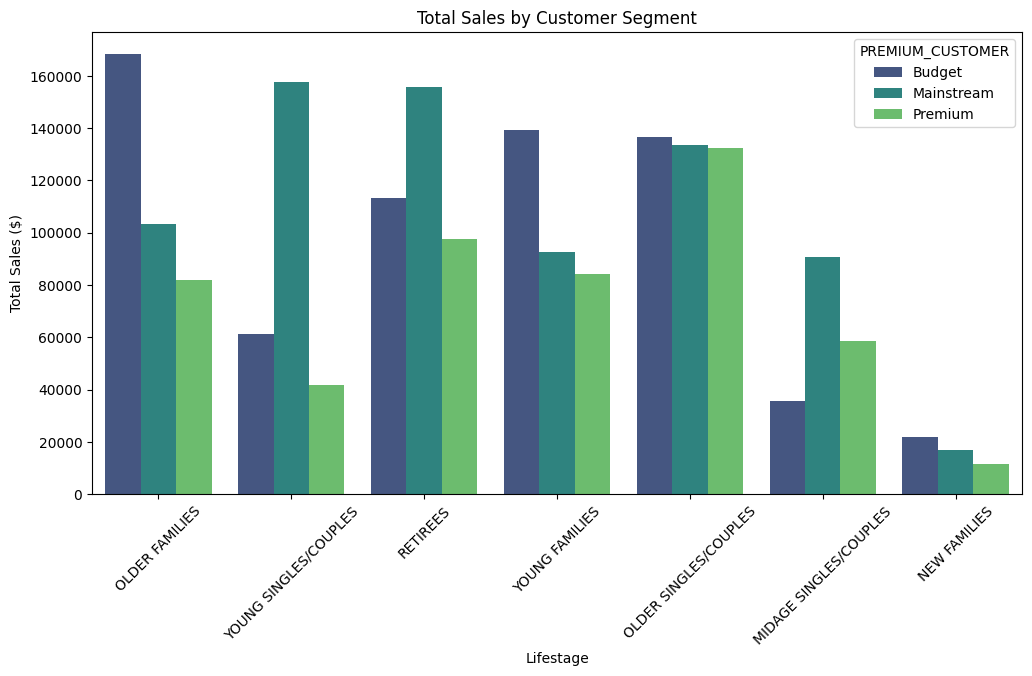

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=customer_segments, x='LIFESTAGE', y='TOT_SALES', hue='PREMIUM_CUSTOMER', palette='viridis')
plt.xticks(rotation=45)
plt.title("Total Sales by Customer Segment")
plt.ylabel("Total Sales ($)")
plt.xlabel("Lifestage")
plt.show()


From the given graph we can interpret that 



Top Buying Segments (Highest Sales) are 
Older Families (Budget customers) have the highest total sales.


Retirees/Young Singles/ Couples (Mainstream customers) also contribute significantly to sales.

Young Families are also strong contributors, especially in the Budget category.

Older Families, Young Families, and Retirees contribute most to total sales, but budget and mainstream customers are the biggest spenders.

Premium customers spend less overall than mainstream or budget customers, except in the Older Singles/Couples category, where all groups spend almost equally.


New Families and Mid-Age Singles/Couples have the lowest sales across all categories.

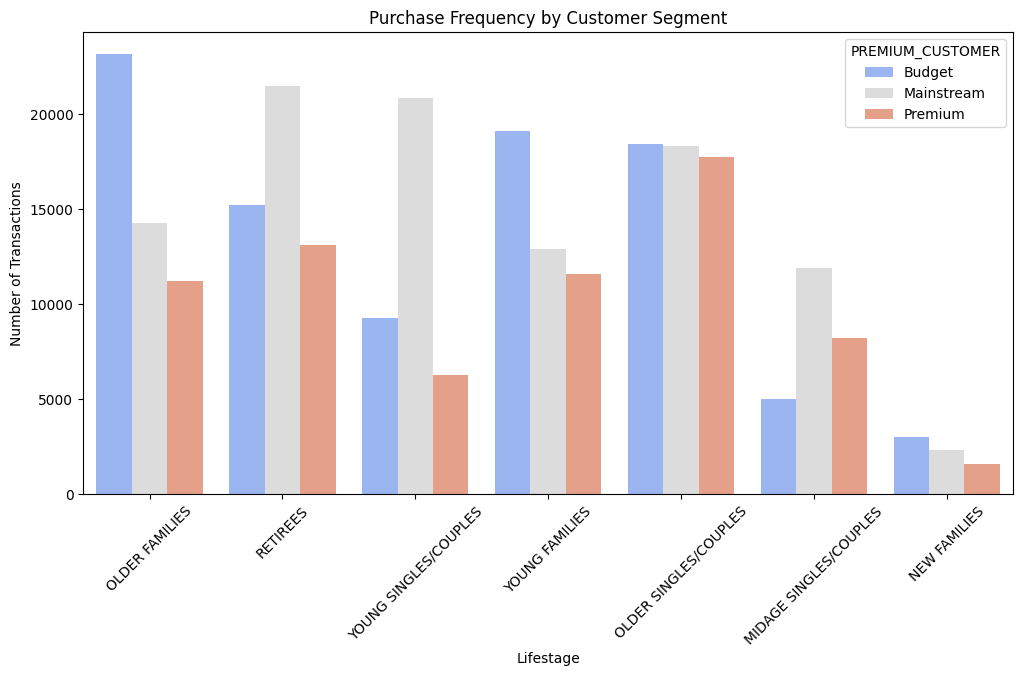

In [26]:
customer_freq = merged_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].count().reset_index()
customer_freq = customer_freq.sort_values(by='LYLTY_CARD_NBR', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=customer_freq, x='LIFESTAGE', y='LYLTY_CARD_NBR', hue='PREMIUM_CUSTOMER', palette='coolwarm')
plt.xticks(rotation=45)
plt.title("Purchase Frequency by Customer Segment")
plt.ylabel("Number of Transactions")
plt.xlabel("Lifestage")
plt.show()


# Observations

Older Families have the highest number of transactions, especially in the Budget category (blue).

Retirees (Mainstream buyers) also make a high number of purchases, aligning with their high total sales from the previous graph.

Young Families & Older Singles/Couples have consistently high purchase frequencies across all categories.

New Families have the least transactions, meaning they are not a key market segment.

Mid-Age Singles/Couples also have fewer purchases compared to other groups, but mainstream and premium customers in this category contribute slightly more.

Key Insights can be: 
1. Older Families & Retirees are the most frequent shoppers
2. Premium Customers are Less Frequent Buyers
3. Young Families & Older Singles/Couples show strong engagement
4. New Families & Mid-Age Singles/Couples are weak segments

Market Strategy Based on Insights 
1. Target Older Families & Retirees
2. Encourage Premium Customers to Buy More Frequently
3. Boost Engagement for New Families & Mid-Age Singles/Couples

In [30]:
# we will check if the premium customers buy the premiumm products 
premium_purchases = merged_df[merged_df['PREMIUM_CUSTOMER'] == 'Premium']
top_premium_products = premium_purchases.groupby('PROD_NAME')['TOT_SALES'].sum().reset_index()
top_premium_products = top_premium_products.sort_values(by='TOT_SALES', ascending=False).head(10)
print(top_premium_products)



                                   PROD_NAME  TOT_SALES
11          Dorito Corn Chp     Supreme 380g   11917.75
86    Smiths Crnkle Chip  Orgnl Big Bag 380g    9310.20
76         Smiths Crinkle      Original 330g    9171.30
6                       Cheezels Cheese 330g    9125.70
33    Kettle Mozzarella   Basil & Pesto 175g    8915.40
32          Kettle Honey Soy    Chicken 175g    8775.00
34                      Kettle Original 175g    8661.60
77  Smiths Crinkle Chips Salt & Vinegar 330g    8646.90
39   Kettle Sweet Chilli And Sour Cream 175g    8494.20
31                        Kettle Chilli 175g    8440.20


Top 10 products purchased by premium customers 

Comparing against budget customers 


In [31]:
budget_purchases = merged_df[merged_df['PREMIUM_CUSTOMER'] == 'Budget']
top_budget_products = budget_purchases.groupby('PROD_NAME')['TOT_SALES'].sum().reset_index()
top_budget_products = top_budget_products.sort_values(by='TOT_SALES', ascending=False).head(10)

print(top_budget_products)

                                   PROD_NAME  TOT_SALES
11          Dorito Corn Chp     Supreme 380g   13068.25
86    Smiths Crnkle Chip  Orgnl Big Bag 380g   12384.10
33    Kettle Mozzarella   Basil & Pesto 175g   12241.80
77  Smiths Crinkle Chips Salt & Vinegar 330g   12192.30
12          Doritos Cheese      Supreme 330g   12152.40
6                       Cheezels Cheese 330g   11850.30
76         Smiths Crinkle      Original 330g   11850.30
39   Kettle Sweet Chilli And Sour Cream 175g   11620.80
35      Kettle Sea Salt     And Vinegar 175g   11512.80
34                      Kettle Original 175g   11442.60


This is what budget customers buy 

Key Insights after comparison 
1. Dorito Corn Chip Supreme 380g is the top-selling product for both budget & premium customers.
2. Smiths Crinkle Chips (various flavors) are also highly purchased across all segments.
3. Kettle brand products are significantly purchased by both segments.
4. Cheezels Cheese 330g is popular across both segments.


# Better business strategy can be 

1. Leverage Doritos as a Key Product for All Customers
2. Target Premium Customers with "Gourmet" Flavors
3. Encourage Budget Customers to Try New Flavors
4.  Boost Sales for Smiths Crinkle Chips

Now that we've analyzed purchase frequency, let's identify the best-selling products for each customer segment.

In [32]:
# top 3 best selling products 
top_products = merged_df.groupby('PROD_NAME')['TOT_SALES'].sum().reset_index()
top_products = top_products.sort_values(by='TOT_SALES', ascending=False).head(3)

print(top_products)

                                   PROD_NAME  TOT_SALES
11          Dorito Corn Chp     Supreme 380g    40352.0
86    Smiths Crnkle Chip  Orgnl Big Bag 380g    36367.6
77  Smiths Crinkle Chips Salt & Vinegar 330g    34804.2


Key Insights:
1.  Doritos is the top-selling product
2.  Smiths Crinkle Chips dominate sales
3.   Packaging size matters

# Now observation of most loyal customer segment 

1. Total sales by customer segment (graph 1)
   1. Older Families and Retirees contribute the highest to total sales.
   2. Premium customers do not significantly outperform Budget/Mainstream customers.
2.  Purchase Frequency by Customer Segment (Graph 2)
    1. Older Families (Budget & Mainstream) have the highest number of transactions.
    2. Retirees (Mainstream customers) also shop frequently.
    3. Young Singles/Couples & Midage Singles/Couples (Premium customers) shop less frequently.
      

# Conclusion 

1. Most Loyal Customer Segment: Older Families (Budget & Mainstream)
   1. They have the highest purchase frequency and total spending.
   2.  They consistently buy in large volumes, making them key revenue drivers.
2. Business Implication:
   1. Since Budget & Mainstream Older Families are the most loyal, consider family-pack promotions and value deals targeting them.
   2. Personalized discounts for frequent shoppers can help maintain their loyalty.
   3. Launch a loyalty program with rewards for repeat purchases.

Top 3 profitable products are 
1. Dorito Corn Chip Supreme 380g → $40,352


2.  Smiths Crinkle Chip Original Big Bag 380g → $36,367.60

3. Smiths Crinkle Chips Salt & Vinegar 330g → $34,804.20

